<a href="https://colab.research.google.com/github/Ayubbett/Moringa-School-Week-9-Independent-Project/blob/main/Moringa_School_Data_Science_Core_W9_Independent_Project_2021_12_AYUB_BETT_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SURVIVAL PREDICTION OF THE TITANIC ACCIDENT***

**Assessment Question**

**1. Defining the Question**

**a) Specifying the Question**

The Titanic Dataset is a collection of the information about the paasengers aboard  in the Titanic ship that sunk in the early 19th century. Our aim is to find which factors were the the leading in contributing to the survival chances of a passenger. We are going to build a model that predicts whether a passenger survived or not basing on the feature variables.

**b) Defining the Metric for Success**

We are going to use the K-Nearest Neighbor algorithm to create a model that shows the likelihood of a passenger surviving the accident. We are going to optimise the model to its best and say that we succeeded when we have an accuracy of between 75% and 95%. Less than that will mean that the model is underfitting while more than our range will mean it is overfitting.

**c) Understanding the context**

This dataset consist of cabin type, class of passenger spot and other features that could have been influenced by the economic situation of the person. In our study we are going to see if any of the features had a large influence on the survival rate of a passenger.

**d) Recording the Experimental Design**

This study will take the following approach:

*   Import the neccesary libraries.
*   Load the dataset and view its column and rows.

*   Clean the data by looking at the missing values, duplicated values, and any anomalies within the data.
*   Perform exploratory data analysis that is Univariate analysis and Bivariate analysis.

*   Perform feature engineering to get the best features to use.
*   Perform modelling using KNN.






**e) Data relevance / Appropriateness of Data**

Below is a description of the dataset column name:

*   Passengerid: The unique identifier of the passenger.
*   survived - Whether the passenger survived or not. (0 = No; 1 = Yes)

*   Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   name - Name of the passenger.

*   sex - Gender of the passenger, either male or female
*   age - Age of the passenger.

*   sibsp - Number of Siblings/Spouses Aboard
*   parch - Number of Parents/Children Aboard

*   ticket - Ticket Number
*   fare - Passenger Fare

*   cabin - Cabin number.
*   embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)








**2. Reading the Data**

In [ ]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the data
df = pd.read_csv("train (5).csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Checking the Data**

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

We have 891 rows and 12 columns

In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**4. External Data Source Validation**

By checking other sources having the same dataset we notice that we have what can be considered the best version of the data we can get.

**5. Tidying the Dataset**

In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We notice that we have 177 missing values in the age column, 687 missing values in the Cabin column and 2 missing values in the Embarked column. Since the cabin columns has more than three quarters of missing values we can drop that column and fill age with mean and embarked with mode.

In [ ]:
#Dropping cabin column
df.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
#Filling misssing values of age and embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
#Futher clealing by removing unnecessary columns, where we are going to drop the id column
df.drop(['PassengerId'], axis=1, inplace = True)

There are no duplicated values.

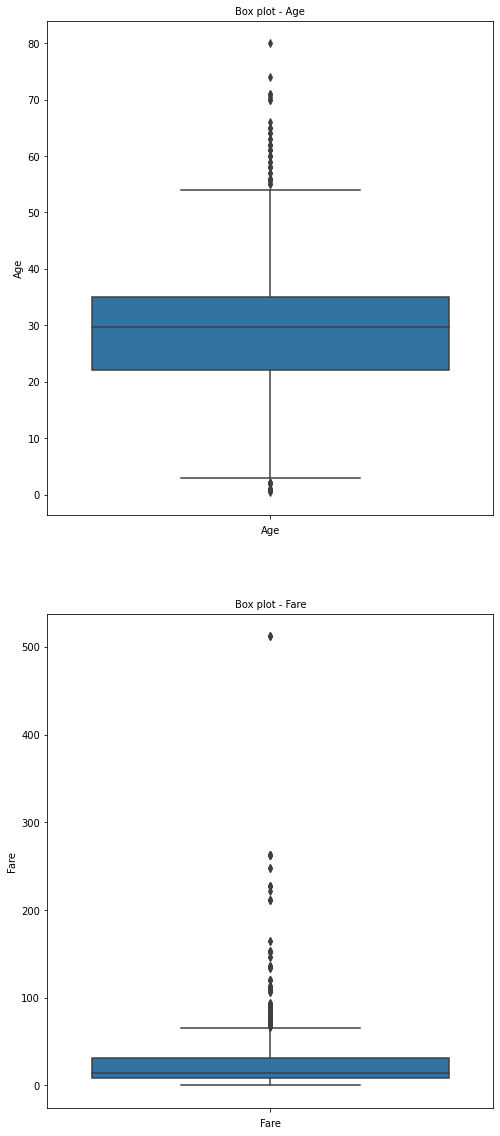

In [ ]:
#Checking for outliers in the numerical columns
Num_col = ['Age', 'Fare']

fig,ax = plt.subplots(len(Num_col),figsize=(8,20))
for i , Num_col in enumerate(Num_col):
  sns.boxplot(y=df[Num_col],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(Num_col), fontsize =10)
  ax[i].set_xlabel(Num_col,fontsize=10)
plt.show()

From the boxplots we notice an extreme outlier in the fare column but we will retain them since they represent Figure of some passengers.

**6. Exploratory Analysis**

**6.1  Univariate Analysis**

In [ ]:
#Checking descriptive statistics of the numeric columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking at the value counts of a few categorical columns


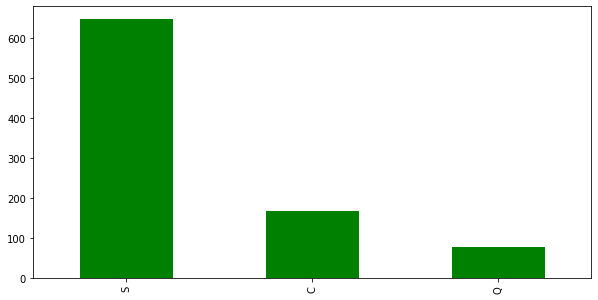

In [ ]:
plt.figure(figsize = (10,5))
df['Embarked'].value_counts().plot(kind = 'bar', color = 'green')

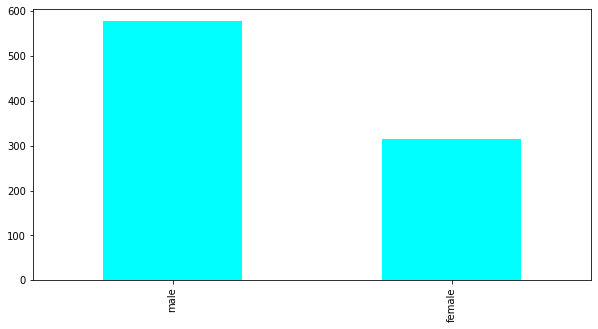

In [ ]:
plt.figure(figsize = (10,5))
df['Sex'].value_counts().plot(kind = 'bar', color = 'Cyan')

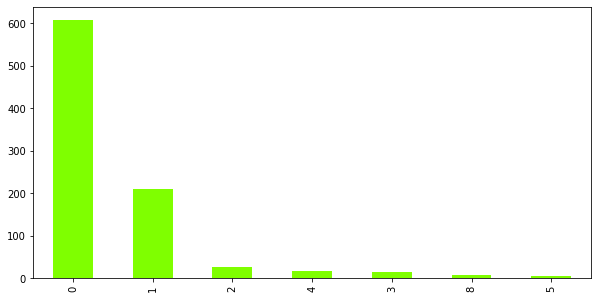

In [ ]:
plt.figure(figsize = (10,5))
df['SibSp'].value_counts().plot(kind = 'bar', color = 'Chartreuse')

From the bar chart count of the categorical values we can note the following:

1.   The most numner of passengers emarked from Southampton with the least embarking from Queenstown.
2.   Most passengers in the ship were male.

3.   Majority of the passengers had no siblings while those having 5 were the least in number.






**6.2  Bivariate Analysis**

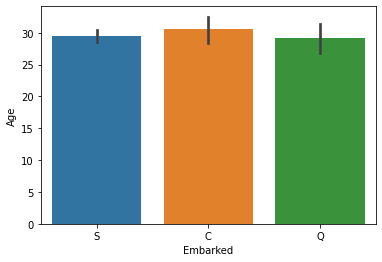

In [ ]:
#Creating a bar plot 
sns.barplot(x='Embarked',y='Age',data=df) 

The mean age of the passengers who embarked from Cherbough is the highest amongst the three stations.

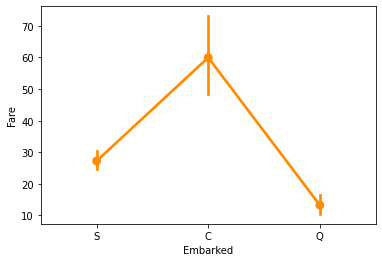

In [ ]:
#Creating a pointplot of the embarked station with fare
sns.pointplot(x='Embarked',y='Fare',data=df,color='darkorange') 

The average fare of the Chebough station is higher than the other stations. Queenstown being the least.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


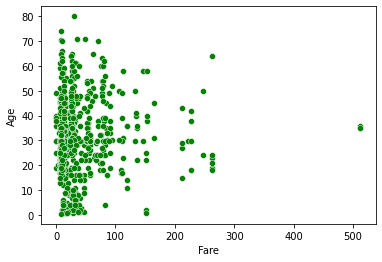

In [ ]:
#Scatterplot of the age with fare
sns.scatterplot(df["Fare"],df['Age'],color='green') 

There is no much relationship between the two variables.

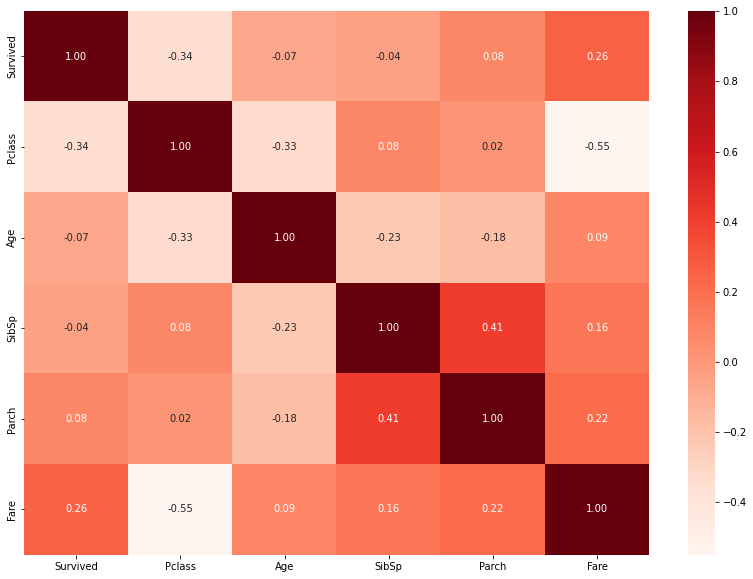

In [ ]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

Generally there is no much correlation between the variables with the strongest being Parents and children with siblings onboard with a correlation of 0.41.

**7. Implementing the Solution**

**K-NEAREST NEIGHBOUR**

In [ ]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


We notice that there are columns that might be difficult to work with so we drop them. These columns include: Name and Ticket.

In [ ]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
#Converting the categorical features into numerical
cat = ['Sex', 'Embarked']

# create dymmy variables
df1 = pd.get_dummies(df[cat])

In [ ]:
#Combining the dummies we have created with the original dataset
df = pd.concat([df,df1], axis="columns")

In [ ]:
#Checking for the changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [ ]:
#Dropping the encoded columns to avoid duplications
df.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [ ]:
#Checking for the changes
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
#Performing feature scaling on the numerical variables:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Feature_Sc = ['Age', 'SibSp', 'Parch', 'Fare']
df[Feature_Sc] = sc. fit_transform(df[Feature_Sc])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.592481,0.432793,-0.473674,-0.502445,0,1,0,0,1
1,1,1,0.638789,0.432793,-0.473674,0.786845,1,0,1,0,0
2,1,3,-0.284663,-0.474545,-0.473674,-0.488854,1,0,0,0,1
3,1,1,0.407926,0.432793,-0.473674,0.420730,1,0,0,0,1
4,0,3,0.407926,-0.474545,-0.473674,-0.486337,0,1,0,0,1


In [ ]:
#Creating a target and feature set
X = df.drop(["Survived"], axis = 1)
y = df['Survived']

**7.1  Using 80:20 ratio**

In [ ]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Fitting KNN into our train sets
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Making prediction using k=1
y_pred_neutral = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_neutral))
print(classification_report(y_test, y_pred_neutral))

[[95 15]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



We have  quite low precision and recall values survival. We also have a stisfactory accuracy of 81% but we are going to do hyperparameter tuning to find the best k, distance metrics and the other KNN parameters.

In [ ]:
#Using Grid search Cv to find the best parameters of the KNN
from sklearn.model_selection import GridSearchCV
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,20, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [ ]:
#Making prediction with the best parameters
KNN_1=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN =KNN_1.predict(X_test)

In [ ]:
#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 


{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


From using grid search our best parameters are k=20, bset distance metric is the manhattan distance because when p=1 in the minkowski distant it is equivalent to manhattan distance.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[103   7]
 [ 19  50]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



With k set to be equal to 20 we get a higher accurracy than when set to 5.

**7.2  Using the 70:30 ratio**

In [ ]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Fitting KNN into our train sets
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
#Making prediction using k=1
y_pred_ratio1 = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_ratio1))
print(classification_report(y_test, y_pred_ratio1))

[[147  21]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.84       168
           1       0.76      0.67      0.71       100

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



Using a lower ratio test and train we get a lower accuracy compared to the previous ones. We are maintaining the same number of k.

**7.3  Using 60:40 Ratio**

In [ ]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
#Fitting KNN into our train sets
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
#Making prediction using k=1
y_pred_ratio2 = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_ratio2))
print(classification_report(y_test, y_pred_ratio2))

[[199  22]
 [ 46  90]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       221
           1       0.80      0.66      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



Using a 60:40 train test ratio yields a higher accuracy than 70:30 ratio

**8. Challenging the solution**

From the above accuracy outputs we notice that we have the highest accuracy when having a more higher train test ratio. It is also notable to say that higher number of neighbours perform better than fewer ones.